#Decision Trees

**Objective: Learn how to apply the decision trees.**

Decision trees are widely used in the banking industry due to their high accuracy and ability to formulate a model in plain language. Since government organizations in many countries carefully monitor lending practices, banks must be able to explain why one applicant was rejected for a loan while the others were approved.

In this lab, we will develop a simple credit approval model using decision trees.

**Source: Lantz Brett, Machine Learning with R. Packt Publishing**

# I. Collecting data

The idea behind our credit model is to identify factors that are predictive of higher risk of default.

We will use a Data available in a dataset donated to the UCI Machine Learning Data Repository by Hans Hofmann of the University of Hamburg.

The dataset contains information on loans obtained from a credit agency in Germany.

The credit dataset includes 1,000 examples on loans, plus a set of numeric and nominal features indicating the characteristics of the loan and the loan applicant.

A class variable indicates whether the loan went into default.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# II. Exploring and preparing the data


## A. Exloring the data

### 1. Import and read the csv data file

In [2]:
credit = pd.read_csv('credit-1.csv')
credit.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


### 2. Examine the structure of the data

In [3]:
credit.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [5]:
credit.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

### 3. Which features can be a possible predictor of a default loan?
The features that can be a possible predictor of a default loan:
checking_balance, months_loan_duration, credit_history, purpose, amount, savings_balance, employment_duration, percent_of_income, years_at_residence, age, other_credit, housing, existing_loans_count, job, dependents, phone

### 4. How can you check and study those features? Explain

I will try EDA to understand the categorical features to solve q5 below, and I alreay applied the describe() to understand about the numeric features.



### 5. What percentage of the loans in the dataset went into default? is it high? How this result can aﬀect the loaning bank?

#### Exploring default column

In [6]:
default_counts = credit['default'].value_counts()
default_percentages = credit['default'].value_counts(normalize=True) * 100

print('Default counts:')
display(default_counts)

print('\nDefault percentages:')
display(default_percentages)

Default counts:


,count
default,
no,700
yes,300



Default percentages:


,proportion
default,
no,70.0
yes,30.0


#### Exploring other Categorical Features


Value counts for checking_balance:


,count
checking_balance,
unknown,394
< 0 DM,274
1 - 200 DM,269
> 200 DM,63



Default rates by checking_balance:


default,no,yes
checking_balance,,
1 - 200 DM,0.609665,0.390335
< 0 DM,0.507299,0.492701
> 200 DM,0.777778,0.222222
unknown,0.883249,0.116751


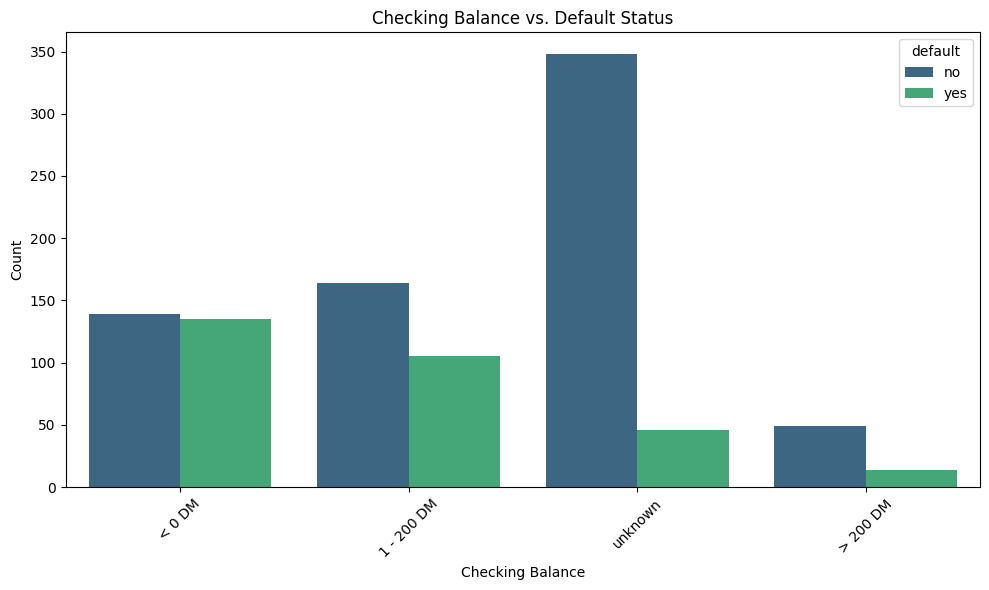

In [7]:
# Analyzing 'checking_balance'
print('Value counts for checking_balance:')
display(credit['checking_balance'].value_counts())

print('\nDefault rates by checking_balance:')
display(pd.crosstab(credit['checking_balance'], credit['default'], normalize='index'))

plt.figure(figsize=(10, 6))
sns.countplot(data=credit, x='checking_balance', hue='default', palette='viridis')
plt.title('Checking Balance vs. Default Status')
plt.xlabel('Checking Balance')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This count plot illustrates the number of loans and their default status across different checking balance categories. It reveals a strong relationship:
Loans associated with an 'unknown' checking balance or a balance '> 200 DM' have a lower proportion of defaults.

Conversely, loans with '< 0 DM' (negative balance) or '1 - 200 DM' (low positive balance) show a higher tendency to default. Specifically, the '< 0 DM' category has a nearly even split between 'yes' and 'no' default, indicating high risk.


Value counts for purpose:


,count
purpose,
furniture/appliances,473
car,337
business,97
education,59
renovations,22
car0,12



Default rates by purpose:


default,no,yes
purpose,,
business,0.649485,0.350515
car,0.685460,0.314540
car0,0.583333,0.416667
education,0.610169,0.389831
furniture/appliances,0.737844,0.262156
renovations,0.636364,0.363636


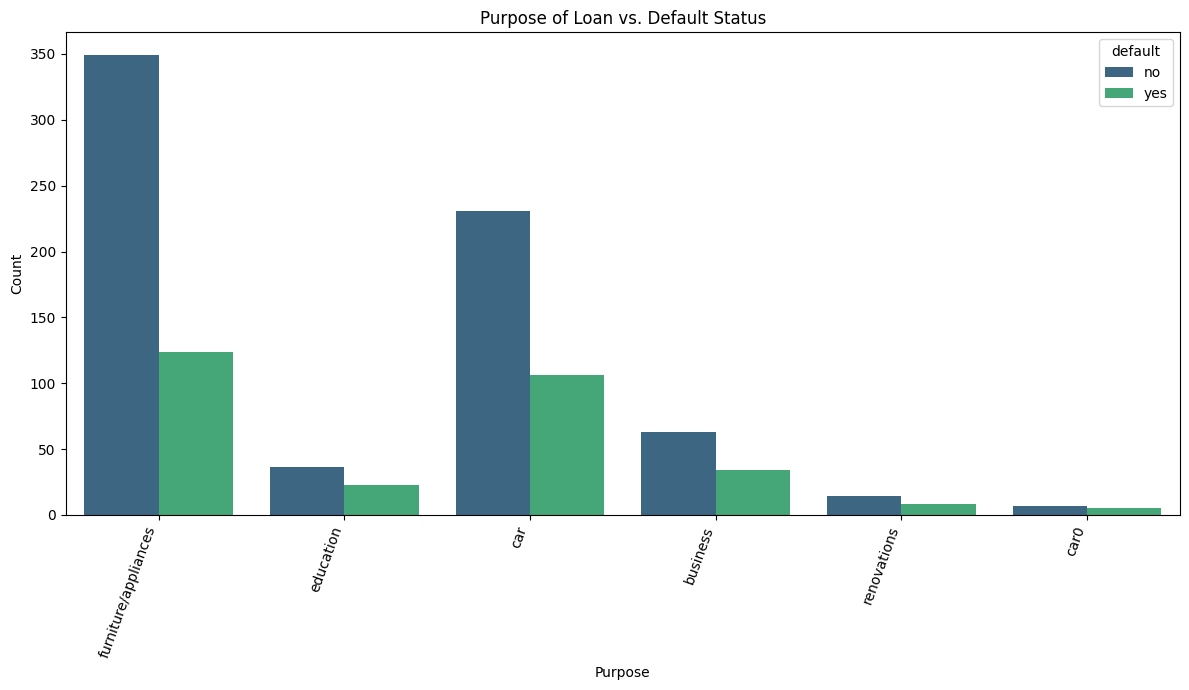

In [8]:
# Analyzing 'purpose'
print('\nValue counts for purpose:')
display(credit['purpose'].value_counts())

print('\nDefault rates by purpose:')
display(pd.crosstab(credit['purpose'], credit['default'], normalize='index'))

plt.figure(figsize=(12, 7))
sns.countplot(data=credit, x='purpose', hue='default', palette='viridis')
plt.title('Purpose of Loan vs. Default Status')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=70, ha='right')
plt.tight_layout()
plt.show()

This bar chart visualizes the distribution of loan purposes and their corresponding default rates. It shows that certain loan purposes carry higher risks:
- Loans for 'business' and 'education' tend to have a higher proportion of defaults compared to other purposes.
- Loans for 'furniture/appliances' appear to have a relatively lower default rate. This shows that people loan for the futiture a lot but mostly, they pay on time sucessfully,

In [11]:
# Analyzing 'employment_duration'
print('Value counts for employment_duration:')
display(credit['employment_duration'].value_counts())

print('\nDefault rates by employment_duration:')
display(pd.crosstab(credit['employment_duration'], credit['default'], normalize='index'))


Value counts for employment_duration:


,count
employment_duration,
1 - 4 years,339
> 7 years,253
4 - 7 years,174
< 1 year,172
unemployed,62



Default rates by employment_duration:


default,no,yes
employment_duration,,
1 - 4 years,0.693215,0.306785
4 - 7 years,0.775862,0.224138
< 1 year,0.593023,0.406977
> 7 years,0.747036,0.252964
unemployed,0.629032,0.370968


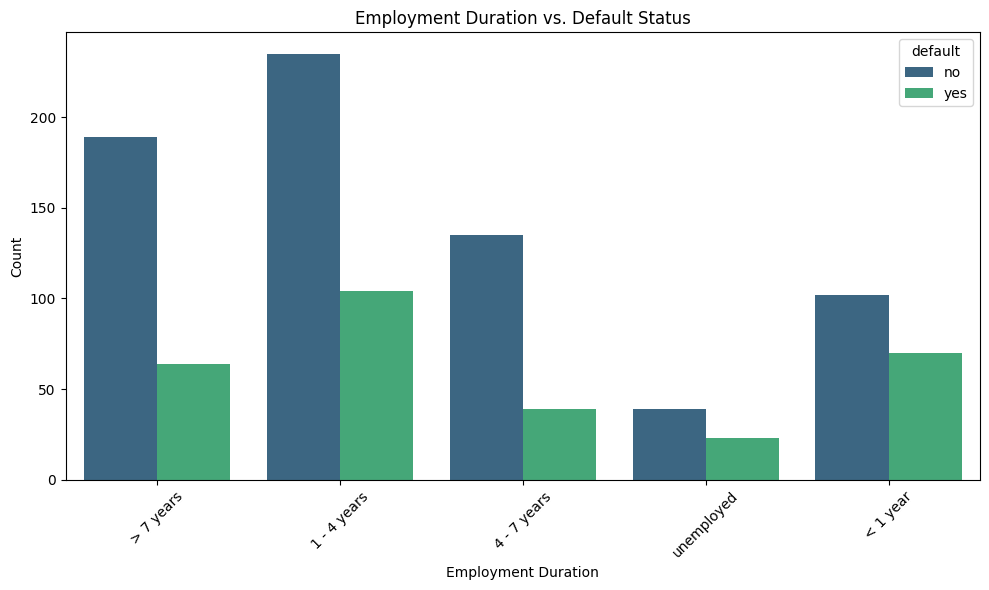

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=credit, x='employment_duration', hue='default', palette='viridis')
plt.title('Employment Duration vs. Default Status')
plt.xlabel('Employment Duration')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This count plot displays the number of loans and their default status based on the applicant's employment duration. It highlights that employment stability is a key factor:
- Applicants with '< 1 year' employment duration or those 'unemployed' show a higher likelihood of defaulting.
- Conversely, individuals with longer employment durations, particularly '4 - 7 years' and '> 7 years', tend to have lower default rates, suggesting that stable employment correlates with a lower risk of default.

In [13]:
print('Value counts for credit_history:')
display(credit['credit_history'].value_counts())

print('\nDefault rates by credit_history:')
display(pd.crosstab(credit['credit_history'], credit['default'], normalize='index'))
default_rate_by_history = credit.groupby('credit_history')['default'].apply(lambda x: (x == 'yes').mean() * 100)
print('\nPercentage of defaults per credit_history category:')
display(default_rate_by_history)

Value counts for credit_history:


,count
credit_history,
good,530
critical,293
poor,88
very good,49
perfect,40



Default rates by credit_history:


default,no,yes
credit_history,,
critical,0.829352,0.170648
good,0.681132,0.318868
perfect,0.375000,0.625000
poor,0.681818,0.318182
very good,0.428571,0.571429



Percentage of defaults per credit_history category:


,default
credit_history,
critical,17.064846
good,31.886792
perfect,62.500000
poor,31.818182
very good,57.142857


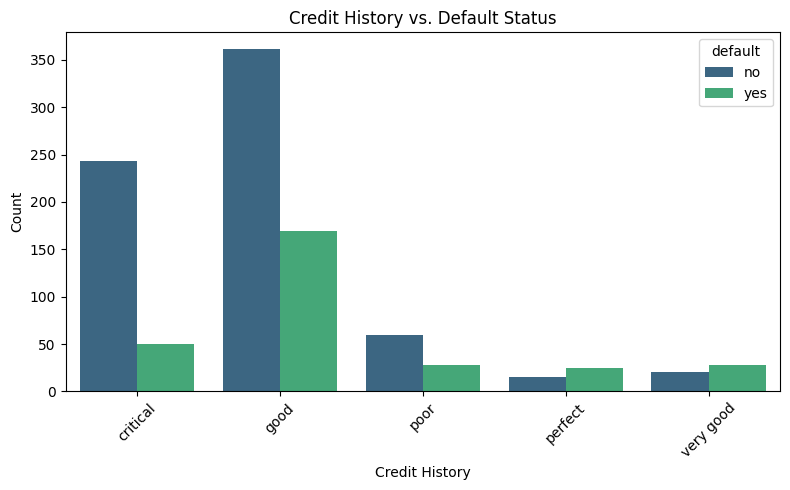

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(data=credit, x='credit_history', hue='default', palette='viridis')
plt.title('Credit History vs. Default Status')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The chart reveals a counter-intuitive relationship between credit history and loan default status in this dataset:

- Higher Risk in 'Clean' Histories: Applicants categorized as 'perfect' and 'very good' unexpectedly show higher default rates, with the number of defaults (Yes) exceeding non-defaults (No).
- Lower Risk in 'Critical' Histories: Conversely, the 'critical' category exhibits a significantly lower default rate, which contradicts standard credit scoring logic.

These anomalies suggest that the 'critical' group might be subject to stricter lending criteria, or the category labels may require specific contextual interpretation within this particular dataset. It is also noted that the sample sizes for 'perfect' and 'very good' are much smaller than 'good' or 'critical', which may contribute to these skewed proportions.

#### Example: Analyzing a Numerical Feature (`amount`)

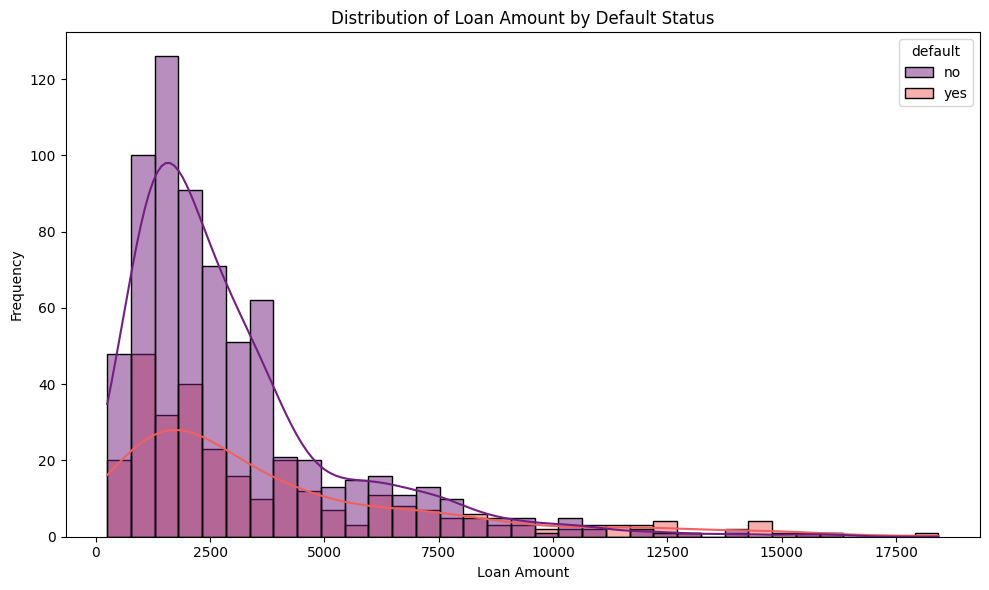

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data=credit, x='amount', hue='default', kde=True, palette='magma')
plt.title('Distribution of Loan Amount by Default Status')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

As we can see from the chart, people requested to loan under 2500 a lot and also got rejected a lot

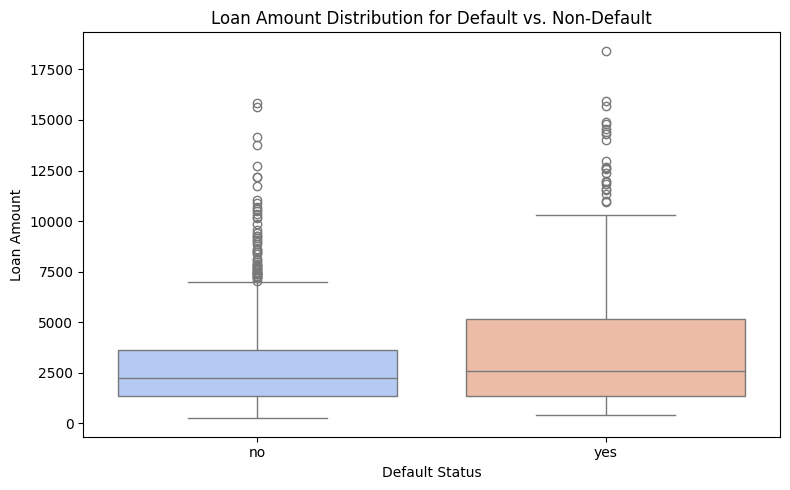

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=credit, x='default', y='amount', hue='default', palette='coolwarm', legend=False)
plt.title('Loan Amount Distribution for Default vs. Non-Default')
plt.xlabel('Default Status')
plt.ylabel('Loan Amount')
plt.tight_layout()
plt.show()

The default no has more loan amount outliers than the default yes

## B. Data preparation (Step 6): Convert categorical data into numerical.

### 6. Apply One hot encoding

In [17]:
credit_encoded = credit.copy()
credit_encoded['default'] = credit_encoded['default'].map({'no': 0, 'yes': 1})

categorical_cols = credit_encoded.select_dtypes(include='object').columns
credit_encoded = pd.get_dummies(credit_encoded, columns=categorical_cols, drop_first=True)

print("DataFrame after one-hot encoding:")
display(credit_encoded.head())
print(f"New shape of DataFrame: {credit_encoded.shape}")

DataFrame after one-hot encoding:


,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,default,checking_balance_< 0 DM,checking_balance_> 200 DM,...,employment_duration_> 7 years,employment_duration_unemployed,other_credit_none,other_credit_store,housing_own,housing_rent,job_skilled,job_unemployed,job_unskilled,phone_yes
0,6,1169,4,4,67,2,1,0,True,False,...,True,False,True,False,True,False,True,False,False,True
1,48,5951,2,2,22,1,1,1,False,False,...,False,False,True,False,True,False,True,False,False,False
2,12,2096,2,3,49,1,2,0,False,False,...,False,False,True,False,True,False,False,False,True,False
3,42,7882,2,4,45,1,2,0,True,False,...,False,False,True,False,False,False,True,False,False,False
4,24,4870,3,4,53,2,2,1,True,False,...,False,False,True,False,False,False,True,False,False,False


New shape of DataFrame: (1000, 36)


#### Exploring Correlations (after encoding)

In [19]:
correlation_matrix = credit_encoded.corr()

print("Correlation with 'default' column:")
display(correlation_matrix['default'].sort_values(ascending=False))

Correlation with 'default' column:


,default
default,1.000000
checking_balance_< 0 DM,0.258333
months_loan_duration,0.214927
savings_balance_< 100 DM,0.161007
amount,0.154739
credit_history_perfect,0.144767
credit_history_very good,0.134448
employment_duration_< 1 year,0.106397
housing_rent,0.092785
percent_of_income,0.072404


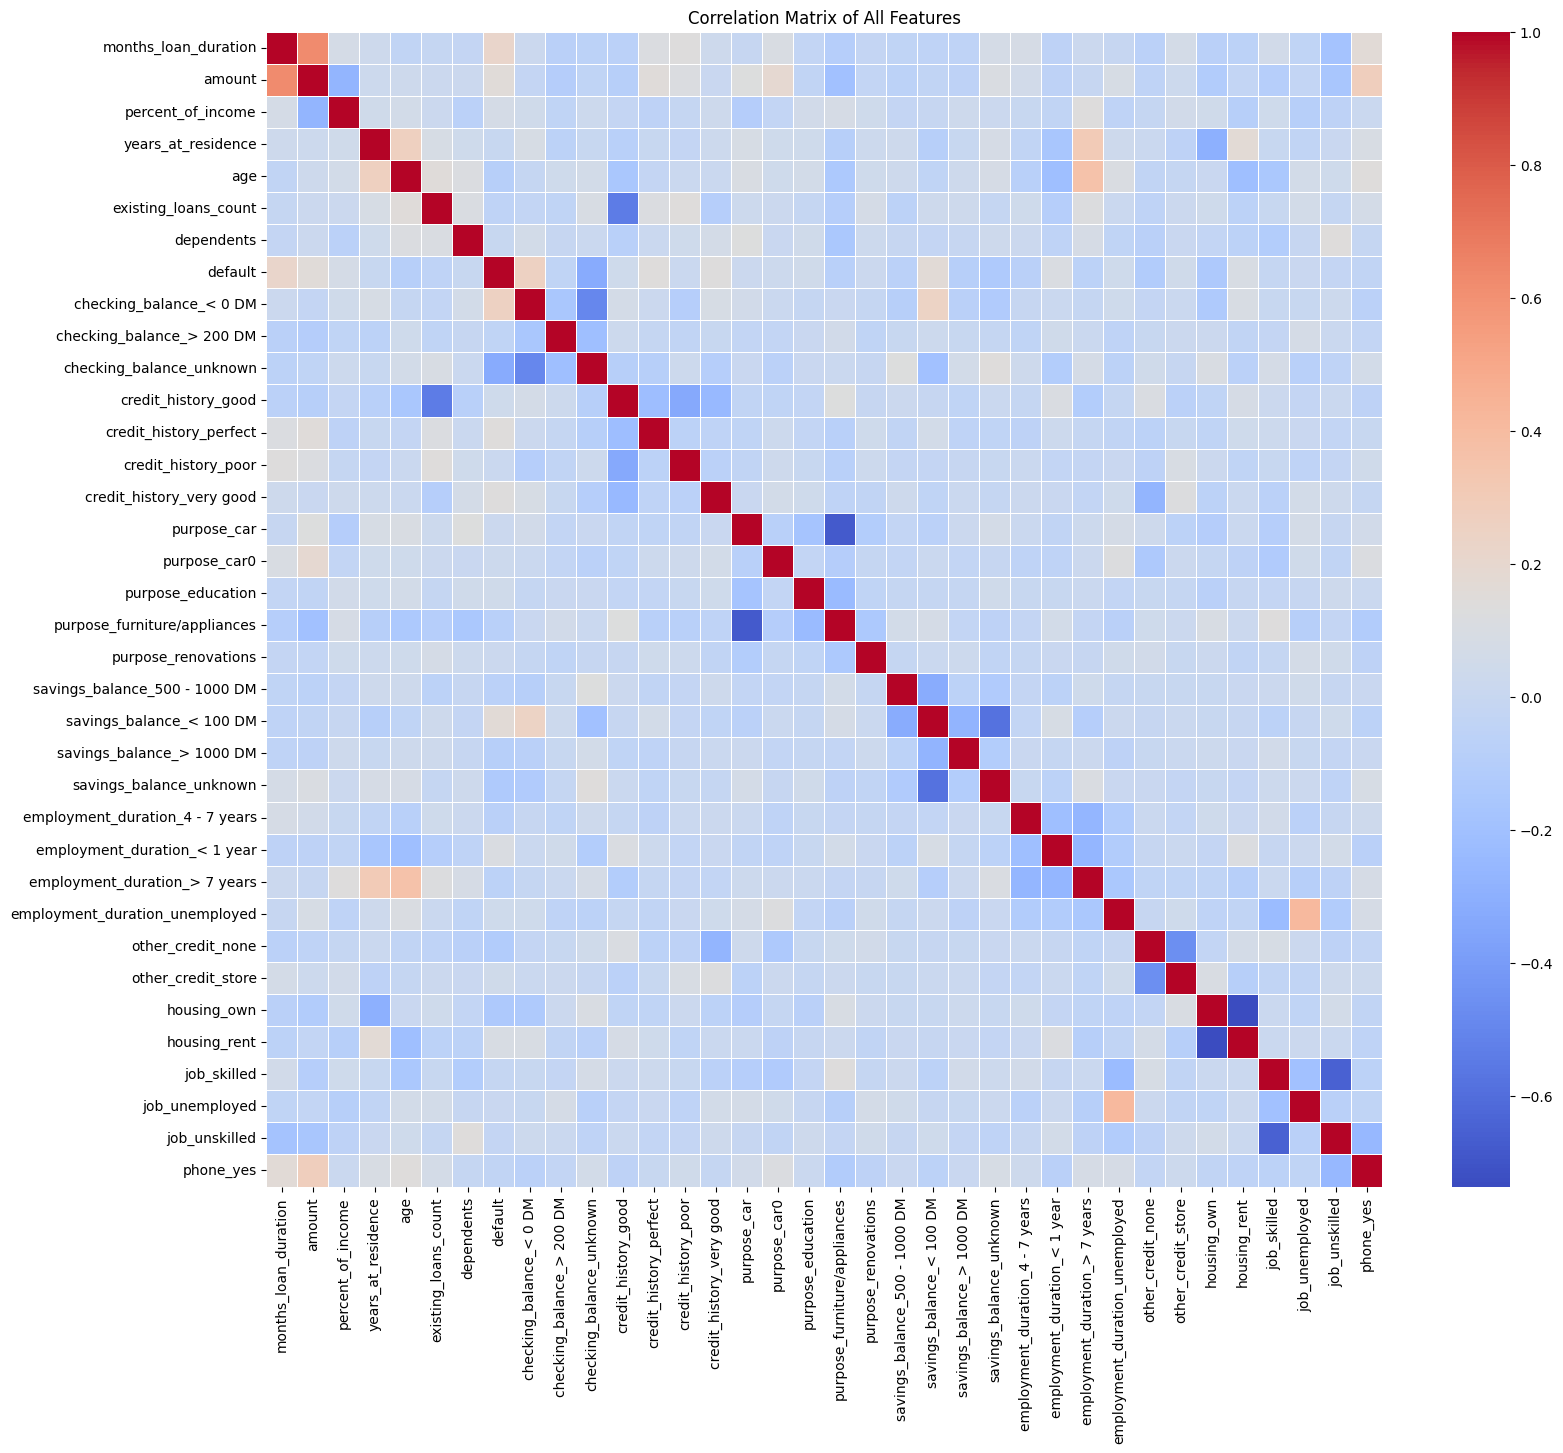

In [20]:
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of All Features')
plt.show()

### 7. Check if your dataset is randomized.

In [22]:
print("First 5 rows of the encoded dataset:")
display(credit_encoded.head())

print("\nLast 5 rows of the encoded dataset:")
display(credit_encoded.tail())

First 5 rows of the encoded dataset:


,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,default,checking_balance_< 0 DM,checking_balance_> 200 DM,...,employment_duration_> 7 years,employment_duration_unemployed,other_credit_none,other_credit_store,housing_own,housing_rent,job_skilled,job_unemployed,job_unskilled,phone_yes
0,6,1169,4,4,67,2,1,0,True,False,...,True,False,True,False,True,False,True,False,False,True
1,48,5951,2,2,22,1,1,1,False,False,...,False,False,True,False,True,False,True,False,False,False
2,12,2096,2,3,49,1,2,0,False,False,...,False,False,True,False,True,False,False,False,True,False
3,42,7882,2,4,45,1,2,0,True,False,...,False,False,True,False,False,False,True,False,False,False
4,24,4870,3,4,53,2,2,1,True,False,...,False,False,True,False,False,False,True,False,False,False



Last 5 rows of the encoded dataset:


,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,default,checking_balance_< 0 DM,checking_balance_> 200 DM,...,employment_duration_> 7 years,employment_duration_unemployed,other_credit_none,other_credit_store,housing_own,housing_rent,job_skilled,job_unemployed,job_unskilled,phone_yes
995,12,1736,3,4,31,1,1,0,False,False,...,False,False,True,False,True,False,False,False,True,False
996,30,3857,4,4,40,1,1,0,True,False,...,False,False,True,False,True,False,False,False,False,True
997,12,804,4,4,38,1,1,0,False,False,...,True,False,True,False,True,False,True,False,False,False
998,45,1845,4,4,23,1,1,1,True,False,...,False,False,True,False,False,False,True,False,False,True
999,45,4576,3,4,27,1,1,0,False,False,...,False,True,True,False,True,False,True,False,False,False


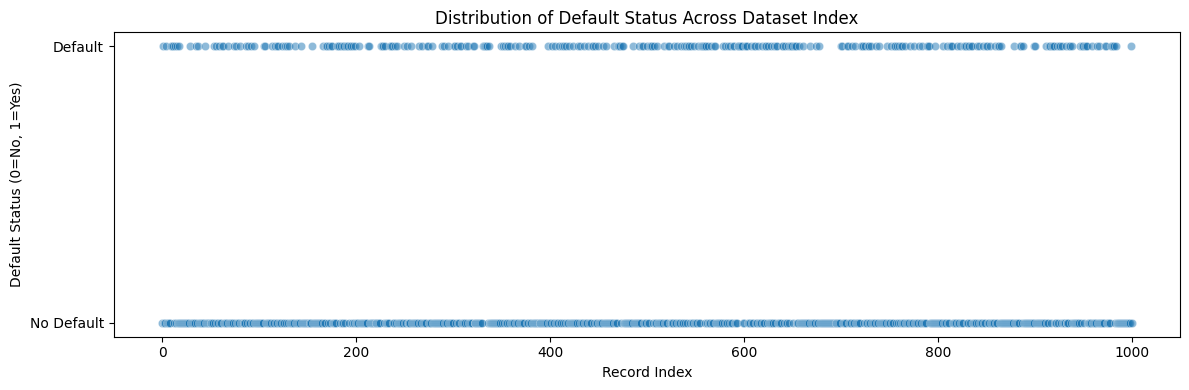

In [24]:
plt.figure(figsize=(12, 4))
sns.scatterplot(x=credit_encoded.index, y=credit_encoded['default'], alpha=0.5)
plt.title('Distribution of Default Status Across Dataset Index')
plt.xlabel('Record Index')
plt.ylabel('Default Status (0=No, 1=Yes)')
plt.yticks([0, 1], ['No Default', 'Default'])
plt.tight_layout()
plt.show()

The data looks random for both default - yes and default - no

# III. Training a model on the data

## 8. Split the data into training and testing sets.

In [26]:
from sklearn.model_selection import train_test_split

X = credit_encoded.drop('default', axis=1)
y = credit_encoded['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (800, 35)
Shape of X_test: (200, 35)
Shape of y_train: (800,)
Shape of y_test: (200,)


## 9. Apply the decision tree algorithm

In [27]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

print("Decision Tree Classifier trained successfully.")

Decision Tree Classifier trained successfully.


## 10. Visualize the model after training

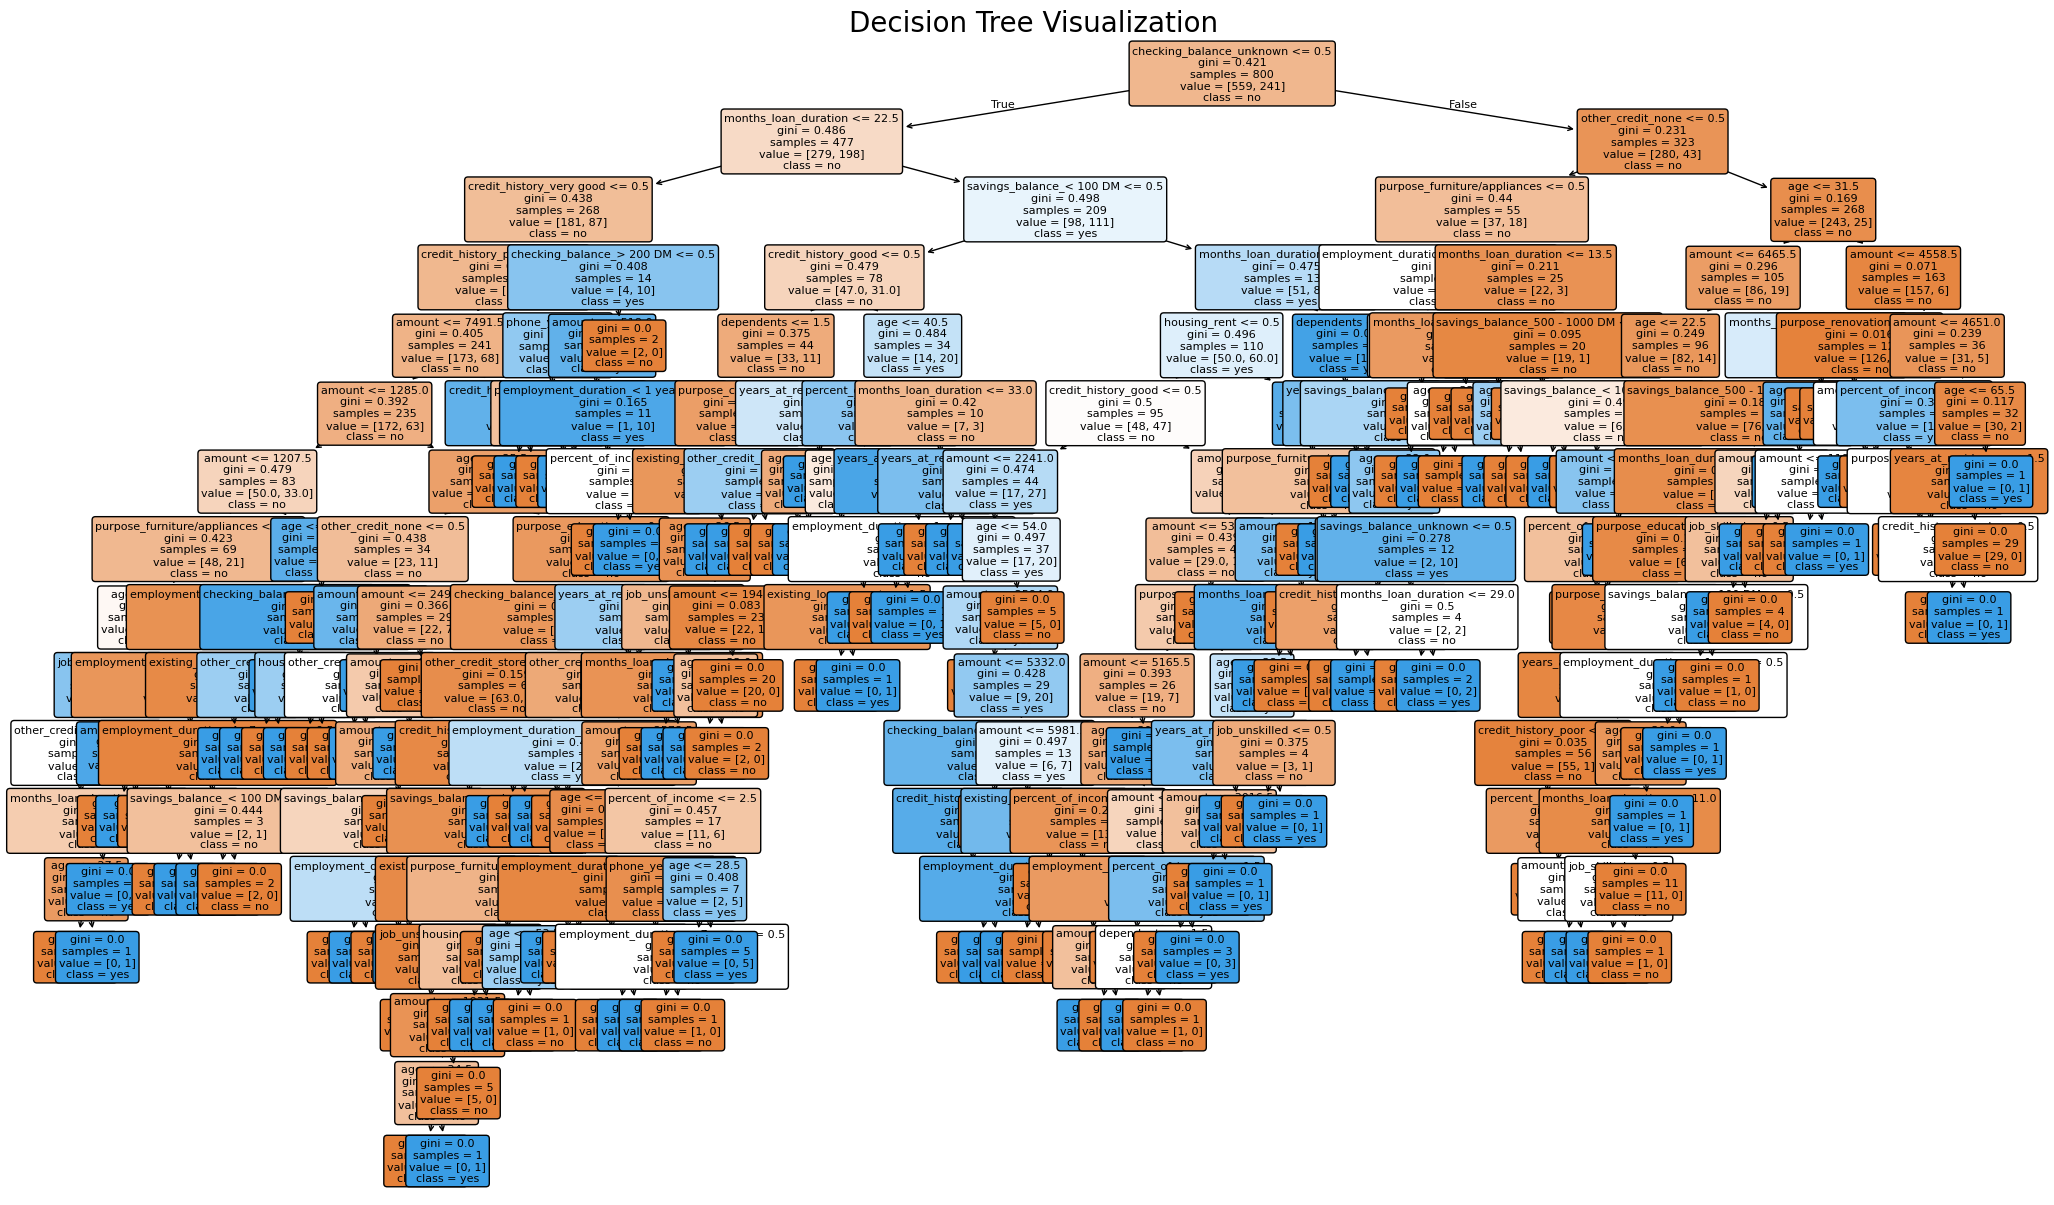

In [29]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 15))  # Adjust figure size for better readability

plot_tree(dt_model,
          feature_names=X_train.columns,
          class_names=['no', 'yes'],
          filled=True,
          rounded=True,
          fontsize=8)

plt.title('Decision Tree Visualization', fontsize=20)
plt.show()

## 11. Find the best predictor features.

Top 10 most important features for predicting default:


,0
amount,0.204908
age,0.154169
months_loan_duration,0.095470
checking_balance_unknown,0.090926
percent_of_income,0.044536
other_credit_none,0.034748
employment_duration_< 1 year,0.034493
purpose_furniture/appliances,0.034051
savings_balance_< 100 DM,0.030218
years_at_residence,0.029870


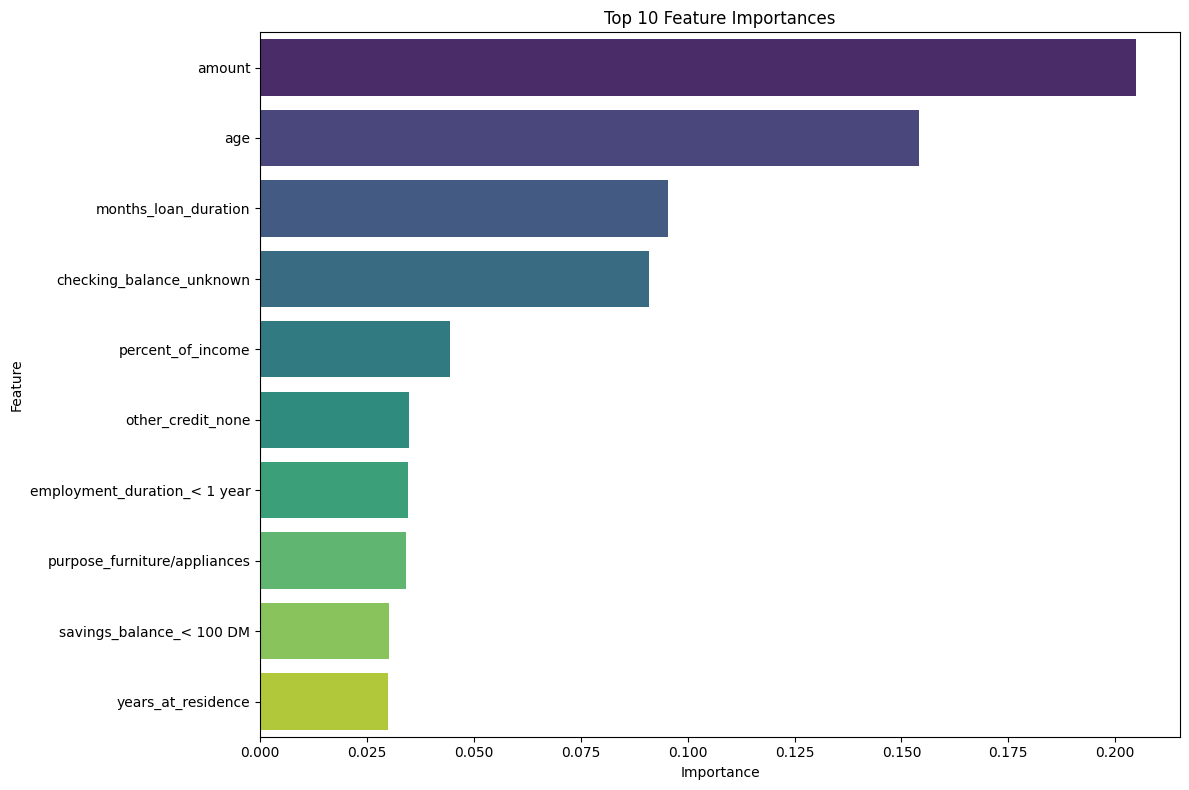

In [36]:
feature_importances = pd.Series(dt_model.feature_importances_, index=X_train.columns)
sorted_feature_importances = feature_importances.sort_values(ascending=False)

print("Top 10 most important features for predicting default:")
display(sorted_feature_importances.head(10))

plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_feature_importances.head(10).values, y=sorted_feature_importances.head(10).index, palette='viridis', hue=sorted_feature_importances.head(10).index, legend=False)
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# IV. Evaluating model performance

## 12. Check the accuracy of the model. Check other metrics.

In [37]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.6500

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       141
           1       0.42      0.47      0.44        59

    accuracy                           0.65       200
   macro avg       0.59      0.60      0.59       200
weighted avg       0.66      0.65      0.66       200



## 13. Is this model a good model?

The Decision Tree model achieved an overall accuracy of 65%.
- Class 0 (No Default):
  - Precision: 0.77 (77% of predicted 'no defaults' were actually 'no default')
  - Recall: 0.72 (72% of actual 'no defaults' were correctly identified)
  - F1-score: 0.74

- Class 1 (Default):
  - Precision: 0.42 (Only 42% of predicted 'defaults' were actually 'default')
  - Recall: 0.47 (Only 47% of actual 'defaults' were correctly identified)
  - F1-score: 0.44

From the result after looking at Class 1's and Class 2's performance metrics, this model is not a good model for a credit approval system in its current state because it shows a low performance for the critical class (default).This is a significant issue, as missing actual defaulters can lead to substantial financial losses for the bank.

The model performs much better for the 'no default' class (precision 0.77, recall 0.72) than for the 'default' class. This indicates that it is biased towards predicting 'no default', which is common in imbalanced datasets where one class is much more frequent (70% 'no default' vs 30% 'default' in our dataset).

# V. Improving model performance

## 14. How can you improve the performance of your decision tree model?

I will try hyperparameter tuning

### GridSearchCV

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score

param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_leaf': [1, 5, 10, 20],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

dt_tuned = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt_tuned, param_grid=param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)


print("Best parameters found: ", grid_search.best_params_)
print("Best F1-score on validation set: {:.4f}".format(grid_search.best_score_))

best_dt_model = grid_search.best_estimator_

y_pred_tuned = best_dt_model.predict(X_test)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"\nTuned Model Accuracy: {accuracy_tuned:.4f}")

print("\nTuned Model Classification Report:")
print(classification_report(y_test, y_pred_tuned))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'splitter': 'best'}
Best F1-score on validation set: 0.4959

Tuned Model Accuracy: 0.6900

Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       141
           1       0.48      0.51      0.49        59

    accuracy                           0.69       200
   macro avg       0.63      0.64      0.63       200
weighted avg       0.70      0.69      0.69       200



### Retraining the Decision Tree with SMOTE Data and Hyperparameter Tuning

In [42]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Shape of X_train after SMOTE:', X_train_smote.shape)
print('Shape of y_train after SMOTE:', y_train_smote.shape)
print('Value counts of y_train after SMOTE:\n', y_train_smote.value_counts())

Shape of X_train after SMOTE: (1118, 35)
Shape of y_train after SMOTE: (1118,)
Value counts of y_train after SMOTE:
 default
1    559
0    559
Name: count, dtype: int64


In [45]:

param_grid_smote = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_leaf': [1, 5, 10, 20],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'class_weight': [None, 'balanced']
}

dt_smote_tuned = DecisionTreeClassifier(random_state=42)

grid_search_smote = GridSearchCV(estimator=dt_smote_tuned, param_grid=param_grid_smote, cv=5, scoring='f1', verbose=1, n_jobs=-1)

grid_search_smote.fit(X_train_smote, y_train_smote)

print("Best parameters found with SMOTE and tuning: ", grid_search_smote.best_params_)
print("Best F1-score on validation set with SMOTE and tuning: {:.4f}".format(grid_search_smote.best_score_))

best_dt_model_smote = grid_search_smote.best_estimator_
y_pred_smote = best_dt_model_smote.predict(X_test)

accuracy_smote = accuracy_score(y_test, y_pred_smote)
print(f"\nTuned Model Accuracy with SMOTE: {accuracy_smote:.4f}")

print("\nTuned Model Classification Report with SMOTE:")
print(classification_report(y_test, y_pred_smote))

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best parameters found with SMOTE and tuning:  {'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 10, 'splitter': 'best'}
Best F1-score on validation set with SMOTE and tuning: 0.7356

Tuned Model Accuracy with SMOTE: 0.7050

Tuned Model Classification Report with SMOTE:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       141
           1       0.50      0.49      0.50        59

    accuracy                           0.70       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.70      0.70      0.70       200



## Summary:

- The initial Decision Tree model is not a good model for a credit approval system in its current state. While it achieved an accuracy of 65%, its performance for the critical 'default' class (Class 1) was poor, with a precision of 0.42, recall of 0.47, and an F1-score of 0.44. This means it misses more than half of the actual defaulters and incorrectly flags many non-defaulters as high-risk, which is highly undesirable for risk mitigation in banking. The performance of the decision tree model can be improved by Hyperparameter tuning and Handling imbalanced data. The final accuracy is 70.5 with a Precision for class 0 and 1 are 0.79 and 0.50, and the recall was 0.79 and 0.49 for class 0 and 1. As we can see, the accuracy is increased but it's still not too good to use because error/loss in banking cost a lot.
- The top 3 most important features identified by the initial Decision Tree model for predicting default were amount, age, and months_loan_duration.